In [1]:
eFiles = [open("e"+str(i)+".txt").read() for i in range(20)]
jFiles = [open("j"+str(i)+".txt").read() for i in range(20)]
sFiles = [open("s"+str(i)+".txt").read() for i in range(20)]

In [21]:
def charToNum(char):
    if(ord(char)==32):
        return 26;
    else:
        return ord(char)-97


In [44]:
counts = [0 for i in range(27)]

for i in range(10):
    for char in eFiles[i]:
        if(ord(char) == 10):
            continue;
        else:
            counts[charToNum(char)] += 1
tot = sum(counts)
thetae = [(counts[i]+alpha)/(tot+alpha*K) for i in range(27)]

counts = [0 for i in range(27)]

for i in range(10):
    for char in jFiles[i]:
        if(ord(char) == 10):
            continue;
        else:
            counts[charToNum(char)] += 1
tot = sum(counts)
thetaj = [(counts[i]+alpha)/(tot+alpha*K) for i in range(27)]

counts = [0 for i in range(27)]

for i in range(10):
    for char in sFiles[i]:
        if(ord(char) == 10):
            continue;
        else:
            counts[charToNum(char)] += 1
tot = sum(counts)
thetas = [(counts[i]+alpha)/(tot+alpha*K) for i in range(27)]

In [45]:
counts = [0 for i in range(27)]
for char in eFiles[10]:
    if(ord(char) == 10):
        continue;
    else:
        counts[charToNum(char)] += 1

In [58]:
import math
pxye = 0
for i in range(27):
    pxye += math.log(thetae[i])*counts[i]
print(pxye)

pxyj = 0
for i in range(27):
    pxyj += math.log(thetaj[i])*counts[i]
print(pxyj)

pxys = 0
for i in range(27):
    pxys += math.log(thetas[i])*counts[i]
print(pxys)


-7841.865447060635
-8771.433079075032
-8467.282044010557


In [63]:
print(pxye + math.log(1/3))
print(pxyj + math.log(1/3))
print(pxys + math.log(1/3))

-7842.964059349303
-8772.5316913637
-8468.380656299225


In [64]:
def naiveBayesClassifier(thetae,thetaj,thetas,counts):
    pxye = 0
    for i in range(27):
        pxye += math.log(thetae[i])*counts[i]
    pxyj = 0
    for i in range(27):
        pxyj += math.log(thetaj[i])*counts[i]
    pxys = 0
    for i in range(27):
        pxys += math.log(thetas[i])*counts[i]
    
    m = max(pxye,pxyj,pxys)
    if(m == pxye):
        return 0
    if(m == pxyj):
        return 1
    if(m == pxys):
        return 2
    

In [66]:
mat = [[0 for i in range(3)] for j in range(3)]
for i in range(10,20):
    counts = [0 for j in range(27)]
    for char in eFiles[i]:
        if(ord(char) == 10):
            continue;
        else:
            counts[charToNum(char)] += 1
    prediction = naiveBayesClassifier(thetae,thetaj,thetas,counts)
    mat[0][prediction] += 1
    
    counts = [0 for j in range(27)]
    for char in jFiles[i]:
        if(ord(char) == 10):
            continue;
        else:
            counts[charToNum(char)] += 1
    prediction = naiveBayesClassifier(thetae,thetaj,thetas,counts)
    mat[1][prediction] += 1
    
    counts = [0 for j in range(27)]
    for char in sFiles[i]:
        if(ord(char) == 10):
            continue;
        else:
            counts[charToNum(char)] += 1
    prediction = naiveBayesClassifier(thetae,thetaj,thetas,counts)
    mat[2][prediction] += 1

In [67]:
print(mat)

[[10, 0, 0], [0, 10, 0], [0, 0, 10]]


In [71]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [878]:
import numpy as np

alpha = .0001
batch_size = 32
d1 = 300
d2 = 200
d3 = 100
d = 784
k = 10

def sigma(z):
    if(z>500):
        print("hi")
        return 1
    if(z<-500):
        print("hi0")
        return 0
    
    return 1/(1+math.exp(-z))

def sigma_vec(z):
    return [[sigma(z[i][0])] for i in range(len(z))]
def g(zbar):
    n = len(zbar)
    vOut = [[0] for i in range(n)]
    for i in range(n):
        try:
            vOut[i][0] = 1/sum([math.exp(zbar[j][0] - zbar[i][0]) for j in range(n)])
        except:
#             print(zbar)
            print("hi1")
    return np.array(vOut)
def onehot(y):
    vOut = [[0] for i in range(10)]
    vOut[y] = [1]
    return np.array(vOut)
def D(zbar):
    n = len(zbar)
    mOut = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        mOut[i][i] = sigma(zbar[i][0])*(1-sigma(zbar[i][0]))
    return np.array(mOut)


In [791]:
def cost(y, yhat):
    return -sum([y[i]*math.log(yhat[i]) for i in range(len(y))])
def predict(W1, W2, W3, z0):
    z1 = np.matmul(W1, z0)
    z2 = np.matmul(W2, sigma_vec(z1))
    z3 = np.matmul(W3, sigma_vec(z2))
    prediction = g(z3)
#     print("z0",z0)
#     print("z1",z1)
#     print("z2",z2)
#     z3 += np.array([[1111],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
    print("z3",z3)
    maxindex = 0
    maxprob = 0
    for i in range(10):
        if(prediction[i] > maxprob):
            maxprob = prediction[i]
            maxindex = i
    return maxindex
def learn(X, y, batches, alpha, batch_size, d1, d2, d, k):
    W1 = np.array([[(np.random.rand()-.5)/1000 for i in range(d)] for j in range(d1)], dtype = "float")
    W2 = np.array([[(np.random.rand()-.5)/100 for i in range(d1)] for j in range(d2)], dtype = "float")
    W3 = np.array([[(np.random.rand()-.5)/100 for i in range(d2)] for j in range(k)], dtype = "float")
    costArr = []
    for j in range(batches):
        W1adjust = np.array([[0 for i in range(d)] for j in range(d1)], dtype = "float")
        W2adjust = np.array([[0 for i in range(d1)] for j in range(d2)], dtype = "float")
        W3adjust = np.array([[0 for i in range(d2)] for j in range(k)], dtype = "float")
        totCost = 0
#         print(W3)

        for k1 in range(batch_size):
            l = j*batch_size + k1
            l = k1
            z0 = [[X[l][i]] for i in range(len(X[l]))]
            z1 = np.matmul(W1, z0)
            print(z1)
            z1sig = sigma_vec(z1)
            z2 = np.matmul(W2, z1sig)
            z2sig = sigma_vec(z2)
            z3 = np.matmul(W3, z2sig)
#             print(W3)
            prediction = g(z3)
            totCost += cost(onehot(int(y[l])), prediction)
#             print(z3)
#             print(g(z3))
            partial3 = np.transpose(np.subtract(prediction,onehot(int(y[l]))))
            partial2 = np.matmul(np.matmul(partial3, W3), D(z2))
            partial1 = np.matmul(np.matmul(partial2, W2), D(z1))
#             print(partial1)
#             if(np.any(partial2)):
#                 print(partial2-partial2[0][0]*np.array([[1.0] for i in range(len(partial2))]))
#             print(len(W3adjust), len(W3adjust[0]))
#             print(np.any(z0), np.any(partial1), np.any(np.matmul(z0,partial1)))
            W3adjust = np.add(W3adjust, np.transpose(np.matmul(z2sig,partial3)))
            W2adjust = np.add(W2adjust, np.transpose(np.matmul(z1sig,partial2)))
            W1adjust = np.add(W1adjust, np.transpose(np.matmul(z0,partial1)))
#             print(np.any(z0), np.any(partial1), np.any(np.matmul(z0,partial1)))
            
        W1adjust *= alpha/batch_size
        W2adjust *= alpha/batch_size
        W3adjust *= alpha/batch_size
        
#         print("W1adjust", W1adjust[0])
#         print("W2", W2)
#         print("W3", W3)
#         print("p1", partial1)
#         print("p2", partial2)
#         print("p3", partial3)
#         print("test", partial3+100*np.transpose(onehot(int(y[0]))))
#         print("p3W3", np.matmul(partial3+100*np.transpose(onehot(int(y[0]))), W3))
#         print("--------------------")
        W1 -= W1adjust
        W2 -= W2adjust
        W3 -= W3adjust
        costArr.append(totCost)
    return W1,W2,W3,costArr

In [792]:
W1, W2, W3, costArr = learn(X, y, batches = 100, alpha = 0.05, batch_size = 2, d1 = 30, d2 = 10, d = 784, k = 10)

[[ 0.23754877]
 [-0.25354223]
 [ 0.13723285]
 [-0.88136517]
 [ 0.38691258]
 [ 0.18169819]
 [ 0.55910377]
 [ 1.14624182]
 [ 0.4347651 ]
 [-0.13450475]
 [ 1.02079575]
 [ 0.8441491 ]
 [ 0.86339453]
 [-0.48935896]
 [-0.3378213 ]
 [ 0.79317538]
 [-2.26227107]
 [-0.17582978]
 [ 0.50113794]
 [-0.37689047]
 [-0.28981192]
 [-0.03726816]
 [-0.77049211]
 [-0.67231911]
 [-0.38348684]
 [-0.56297247]
 [ 0.06607566]
 [ 0.38179661]
 [ 0.35293175]
 [ 0.14786237]]
[[ 0.75923566]
 [ 0.21807784]
 [ 0.58394481]
 [-1.3007243 ]
 [ 0.43897114]
 [ 0.15796034]
 [-0.71301096]
 [ 1.39747563]
 [ 0.18809459]
 [-0.28938878]
 [-0.04498642]
 [ 0.21110148]
 [ 1.58167158]
 [ 0.02882505]
 [-0.84753573]
 [ 0.02966922]
 [-0.85186794]
 [ 0.49598541]
 [ 0.05866692]
 [-0.01426575]
 [ 0.8072739 ]
 [ 0.65907313]
 [-0.03764063]
 [-0.87920213]
 [ 1.14953172]
 [-0.35994191]
 [ 0.69499782]
 [ 0.81401013]
 [ 0.58644798]
 [ 0.0430549 ]]
[[-0.05169448]
 [-0.01349162]
 [ 0.34447846]
 [-0.93192528]
 [ 0.44819909]
 [ 0.89375449]
 [ 0.373

[[10.05180468]
 [10.18638275]
 [10.23140964]
 [-6.58612578]
 [10.22699471]
 [10.28909599]
 [10.21222414]
 [10.26680522]
 [-6.52476023]
 [-7.36534905]
 [10.11302353]
 [10.15497547]
 [10.15256808]
 [-8.01050192]
 [-6.61561617]
 [-7.3195525 ]
 [10.14014998]
 [10.16064977]
 [-7.29788195]
 [-7.46306819]
 [10.19455394]
 [10.25840956]
 [10.09248442]
 [10.21930174]
 [10.11109135]
 [10.18819172]
 [-7.26534359]
 [10.18789964]
 [10.22555536]
 [10.22519433]]
[[10.34732595]
 [10.45982003]
 [10.50035655]
 [-6.8071768 ]
 [10.43792297]
 [10.50562245]
 [10.429295  ]
 [10.52341417]
 [-6.84428846]
 [-7.65617077]
 [10.3786545 ]
 [10.20634276]
 [10.51052527]
 [-8.17245145]
 [-7.00705976]
 [-7.68810723]
 [10.59145712]
 [10.50912833]
 [-7.54758923]
 [-7.63996044]
 [10.50015689]
 [10.5345354 ]
 [10.51555113]
 [10.40349104]
 [10.47273416]
 [10.49934641]
 [-7.13547678]
 [10.50011214]
 [10.40225864]
 [10.39047447]]
[[10.11729871]
 [10.24781159]
 [10.29153574]
 [-6.6135563 ]
 [10.28755384]
 [10.34781167]
 [10.273

[[11.28172208]
 [11.35134957]
 [11.3772549 ]
 [-7.20371828]
 [11.33257877]
 [11.37665172]
 [11.32784415]
 [11.39144407]
 [-7.23767288]
 [-8.08438792]
 [11.29938089]
 [11.17392622]
 [11.39068065]
 [-8.61510989]
 [-7.3947021 ]
 [-8.10934668]
 [11.44959689]
 [11.38891706]
 [-7.97566552]
 [-8.0798037 ]
 [11.37970699]
 [11.39996436]
 [11.39860451]
 [11.30838553]
 [11.3662112 ]
 [11.37994776]
 [-7.57397747]
 [11.38038602]
 [11.30722792]
 [11.29869904]]
[[11.0077168 ]
 [11.0935991 ]
 [11.1227665 ]
 [-6.98992192]
 [11.12321599]
 [11.16286449]
 [11.11324419]
 [11.14637501]
 [-6.92730266]
 [-7.80064828]
 [11.04760964]
 [11.08582826]
 [11.06715443]
 [-8.44542422]
 [-7.01744956]
 [-7.76010393]
 [11.05336407]
 [11.07277474]
 [-7.73336362]
 [-7.89726534]
 [11.09700868]
 [11.13983491]
 [11.02503408]
 [11.11967203]
 [11.0406557 ]
 [11.0926507 ]
 [-7.6749728 ]
 [11.09227423]
 [11.12439275]
 [11.12462956]]
[[11.30041873]
 [11.36937259]
 [11.39504299]
 [-7.21166381]
 [11.35066432]
 [11.39435536]
 [11.345

[[11.63215581]
 [11.69013436]
 [11.71195334]
 [-7.3524385 ]
 [11.67252332]
 [11.70994072]
 [11.66886977]
 [11.72368141]
 [-7.38618098]
 [-8.24750765]
 [11.64626454]
 [11.53463757]
 [11.7258807 ]
 [-8.78376986]
 [-7.5421483 ]
 [-8.26962844]
 [11.77817093]
 [11.72406387]
 [-8.13799684]
 [-8.2471631 ]
 [11.71497971]
 [11.73137741]
 [11.73431071]
 [11.65132039]
 [11.70510997]
 [11.71548768]
 [-7.73819582]
 [11.7158424 ]
 [11.65018192]
 [11.64263422]]
[[11.34894588]
 [11.42205999]
 [11.44697499]
 [-7.1360928 ]
 [11.44853911]
 [11.48217112]
 [11.43981529]
 [11.46735098]
 [-7.07118473]
 [-7.95791793]
 [11.38317131]
 [11.41975417]
 [11.39782362]
 [-8.60314819]
 [-7.16123573]
 [-7.91970552]
 [11.38410723]
 [11.4027747 ]
 [-7.89149321]
 [-8.05453069]
 [11.42432816]
 [11.4614024 ]
 [11.36068562]
 [11.44602678]
 [11.37533663]
 [11.42046985]
 [-7.82508312]
 [11.42008935]
 [11.45029381]
 [11.45066951]]
[[11.64103448]
 [11.6987433 ]
 [11.72046704]
 [-7.35619764]
 [11.68116122]
 [11.7184232 ]
 [11.677

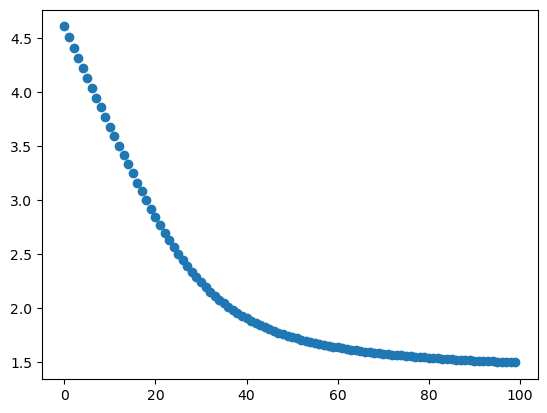

In [784]:
import matplotlib.pyplot as pl
pl.scatter([i for i in range(len(costArr))],costArr)

In [786]:

correctCount = 0
for l in range(500,511):
    prediction = predict(W1, W2, W3, [[specialSet[l][i]] for i in range(len(specialSet[l]))])
    print(prediction,specialSety[l])
    if(prediction == int(specialSety[l])):
        correctCount += 1
        

z3 [[ 3.38997252]
 [-0.83949756]
 [-0.84856463]
 [-0.84889687]
 [-0.83705902]
 [ 3.38996979]
 [-0.84270957]
 [-0.83982728]
 [-0.84311828]
 [-0.8443276 ]]
0 0
z3 [[ 3.35565003]
 [-0.8309977 ]
 [-0.83997383]
 [-0.84030262]
 [-0.82858352]
 [ 3.3556491 ]
 [-0.83417633]
 [-0.8313239 ]
 [-0.83458198]
 [-0.83577938]]
0 1
z3 [[ 3.39580606]
 [-0.84094356]
 [-0.85002468]
 [-0.85035747]
 [-0.83849956]
 [ 3.39580384]
 [-0.84415737]
 [-0.84127297]
 [-0.84456861]
 [-0.84578169]]
0 0
z3 [[ 3.31162661]
 [-0.82009566]
 [-0.82895415]
 [-0.82928149]
 [-0.81771221]
 [ 3.31162863]
 [-0.82323319]
 [-0.82041636]
 [-0.82363428]
 [-0.82481551]]
5 1
z3 [[ 3.38035318]
 [-0.83711631]
 [-0.84615696]
 [-0.84648909]
 [-0.83468314]
 [ 3.38035257]
 [-0.84031646]
 [-0.83744397]
 [-0.84072619]
 [-0.84193276]]
0 1
z3 [[ 3.35017728]
 [-0.82964196]
 [-0.83860424]
 [-0.83893236]
 [-0.82723216]
 [ 3.35017675]
 [-0.83281611]
 [-0.82996789]
 [-0.83322081]
 [-0.83441639]]
0 1
z3 [[ 3.39581857]
 [-0.84094668]
 [-0.85002781]
 [-0

In [764]:
print(W1)
print(W2)
print(W3)

[[ 4.10057223e-04  1.16238782e-04 -4.49093675e-04 ...  3.17514389e-04
   4.20931490e-04  9.24649248e-05]
 [ 1.64300808e-04 -4.82331270e-04  4.45587740e-04 ... -3.80018779e-04
  -4.90767959e-04  2.44696439e-04]
 [ 1.26942512e-05 -1.23307588e-04  4.34632930e-04 ...  2.48657547e-04
   3.91627565e-04 -1.98338265e-04]
 ...
 [ 2.48347141e-04  3.32250781e-04 -2.07234899e-04 ... -2.63350424e-04
   2.46851122e-04  4.41836884e-04]
 [ 1.16772266e-04 -5.53272951e-05 -4.13355473e-04 ...  1.13293955e-04
   1.13790824e-04 -3.14932413e-04]
 [-1.09271709e-04 -2.97886857e-04 -3.32836453e-04 ...  2.53763179e-04
  -4.97480681e-04  1.92607852e-05]]
[[ 0.07321579  0.07046245  0.07035322  0.07556005  0.0750855   0.07303599
   0.07358522 -0.00154192 -0.00255175 -0.00427335  0.07030649  0.07495911
   0.07439496  0.01273885  0.07805517  0.07497619 -0.00271466  0.07614238
   0.07064509  0.07646622  0.06874563  0.07662098  0.00176629  0.06211988
   0.00041129  0.06513035  0.0206894   0.04332183  0.07097992  0.068

In [738]:
specialSet = [X[i] for i in range(0,30000) if int(y[i]) < 2]
specialSety = [y[i] for i in range(0,30000) if int(y[i]) < 2]
print(len(specialSet))

6384


In [302]:
print(np.any(W1))

True


In [785]:
print(y[0],y[1])

5 0


In [800]:
X0 = np.array([[X[0][i]] for i in range(len(X[0]))])
X1 = np.array([[X[1][i]] for i in range(len(X[1]))])

np.matmul(W2,sigma_vec(np.matmul(W1,(X0-X1))))

array([[0.61462658],
       [0.61423856],
       [0.60210845],
       [0.61590847],
       [0.61506049],
       [0.61838758],
       [0.60083647],
       [0.60723384],
       [0.60275258],
       [0.61749263]])

In [879]:
def cost(y, yhat):
    return -sum([y[i]*math.log(yhat[i]) for i in range(len(y))])
def predict(W3, z0):
    z1 = np.matmul(W3, z0)
    prediction = g(z3)
#     print("z0",z0)
#     print("z1",z1)
#     print("z2",z2)
#     z3 += np.array([[1111],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
    print("z3",z3)
    maxindex = 0
    maxprob = 0
    for i in range(10):
        if(prediction[i] > maxprob):
            maxprob = prediction[i]
            maxindex = i
    return maxindex
def learn(X, y, batches, alpha, batch_size, d1, d2, d, k):
    W2 = np.array([[(np.random.rand()-.5)/100 for i in range(d)] for j in range(d2)], dtype = "float")
    W3 = np.array([[(np.random.rand()-.5)/100 for i in range(d2)] for j in range(k)], dtype = "float")
    costArr = []
    for j in range(batches):
        W2adjust = np.array([[0 for i in range(d)] for j in range(d2)], dtype = "float")
        W3adjust = np.array([[0 for i in range(d2)] for j in range(k)], dtype = "float")
        totCost = 0

        for k1 in range(batch_size):
            l = j*batch_size + k1
            l = k1
            
            z0 = [[X[l][i]] for i in range(len(X[l]))]
            z2 = np.matmul(W2, z0)
            z2sig = sigma_vec(z2)
            z3 = np.matmul(W3, z2sig)
            prediction = g(z3)
            
            totCost += cost(onehot(int(y[l])), prediction)
            
            partial3 = np.transpose(np.subtract(prediction,onehot(int(y[l]))))
            partial2 = np.matmul(np.matmul(partial3, W3), D(z2))
            
            W3adjust = np.add(W3adjust, np.transpose(np.matmul(z2sig,partial3)))
            W2adjust = np.add(W2adjust, np.transpose(np.matmul(z0,partial2)))
            
        W2adjust *= alpha/batch_size
        W3adjust *= alpha/batch_size
        
        W2 -= W2adjust
        W3 -= W3adjust
        costArr.append(totCost)
    return W2, W3,costArr

In [880]:
W2, W3, costArr = learn(X, y, batches = 100, alpha = 0.01, batch_size = 2, d1 = 30, d2 = 10, d = 784, k = 10)

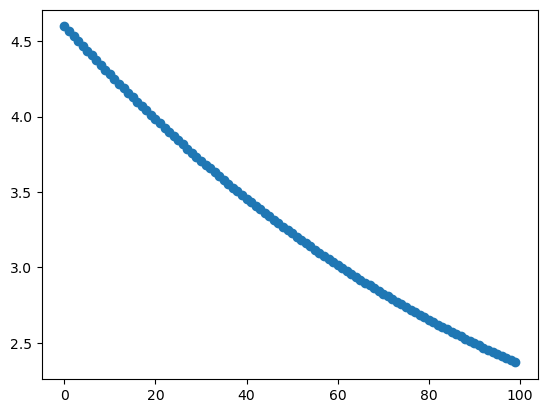

In [881]:
import matplotlib.pyplot as pl
pl.scatter([i for i in range(len(costArr))],costArr)

In [884]:
np.matmul(np.array([[2,4],[1,3],[1,1]]),np.array([[1],[2]]))

array([[10],
       [ 7],
       [ 3]])